

About the Dataset :- The Haberman's Survival Dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 

source :- https://www.kaggle.com/gilsousa/habermans-survival-data-set/data
r
Attribute Information:

1) Age of patient at time of operation (numerical)
2) Patient's year of operation (year - 1900, numerical)
3) Number of positive axillary nodes detected (numerical)
4) Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


Perform a similar alanlaysis as above on this dataset with the following sections:

High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.

Explain our objective.

Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

Write your observations in english as crisply and unambigously as possible. Always quantify your results.

    

# 1)  ENVIRONMENT SETUP

In [112]:
# Importing required packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# 2) LOADING DATA

In [113]:
#loading the data 

bcancer_df =pd.read_csv("haberman.csv")
print(bcancer_df)

     30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
5    33  60   0    1
6    34  59   0    2
7    34  66   9    2
8    34  58  30    1
9    34  60   1    1
10   34  61  10    1
11   34  67   7    1
12   34  60   0    1
13   35  64  13    1
14   35  63   0    1
15   36  60   1    1
16   36  69   0    1
17   37  60   0    1
18   37  63   0    1
19   37  58   0    1
20   37  59   6    1
21   37  60  15    1
22   37  63   0    1
23   38  69  21    2
24   38  59   2    1
25   38  60   0    1
26   38  60   0    1
27   38  62   3    1
28   38  64   1    1
29   38  66   0    1
..   ..  ..  ..  ...
275  67  66   0    1
276  67  61   0    1
277  67  65   0    1
278  68  67   0    1
279  68  68   0    1
280  69  67   8    2
281  69  60   0    1
282  69  65   0    1
283  69  66   0    1
284  70  58   0    2
285  70  58   4    2
286  70  66  14    1
287  70  67   0    1
288  70  68   0    1
289  70  59   8    1
290  70  63  

##### Observation: 
       Confusion to read and understand the data without relevent column names,-
       - For better understanding adding column names.

#### Adding Column names to csv file.

In [114]:

bcancer_df =pd.read_csv("haberman.csv",header=None, 
                        names=['Patients-age','op_year','positive_aux_nodes','surv_status_more_than_5_years'])

# 3) HIGH LEVEL STATISTICS:

In [115]:
bcancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Patients-age                     306 non-null int64
op_year                          306 non-null int64
positive_aux_nodes               306 non-null int64
surv_status_more_than_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [116]:
bcancer_df.head()

,Patients-age,op_year,positive_aux_nodes,surv_status_more_than_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Observation:
    From the above information we have now all the required data,
    surv_status_more_than_5_years column data is numerical,it is diffcult to read, class attribute and considered as invalid data type.
    So  replacing 1 as yes and 2 as no.

In [117]:
print(list(bcancer_df["surv_status_more_than_5_years"].unique()))

[1, 2]


In [118]:
bcancer_df["surv_status_more_than_5_years"]=bcancer_df["surv_status_more_than_5_years"].map({1:"yes",2:"no"})


In [119]:
bcancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Patients-age                     306 non-null int64
op_year                          306 non-null int64
positive_aux_nodes               306 non-null int64
surv_status_more_than_5_years    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [120]:
bcancer_df.head()

,Patients-age,op_year,positive_aux_nodes,surv_status_more_than_5_years
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


#### Observations:
    1) Now datatype of surv_status_more_than_5_years is changed to the object and now data is readble.
    2) Yes means:Patient survived more than 5 years,NO:Means Patient did not survived more than 5 years.
    

In [121]:
bcancer_df.describe()

,Patients-age,op_year,positive_aux_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Observations:
    1) Total available datapoints are 306.
    2) Minimum age is 30 and maximum age of a patient is 83
    3) Operation treatment happened between 1958 - 1969.
    4) 75 % of patients Positive axillary nodes detected as less than 0-4,-
       -Maximum axillary nodes detected as 52.
    5) 25% of patients has no Positive axillary nodes.
    6) Lesser data points are available.

In [122]:
print(bcancer_df["surv_status_more_than_5_years"].value_counts())


yes    225
no      81
Name: surv_status_more_than_5_years, dtype: int64


#### Observations:
   From the above Result, This data set is defined as imbalanced because number of data points-
    - for yes and no are not equal.

# 4)  OBJECTIVE:

    To predict patients will survive (or) not after 5 years based on age,-
     - Opeartion year and Positive axillary nodes

# 5) Univaraite analysis(PDF, CDF, Boxplot, Voilin plots)

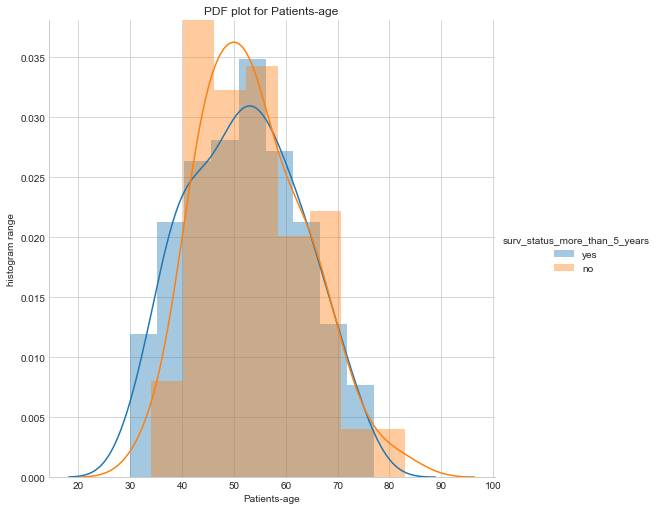

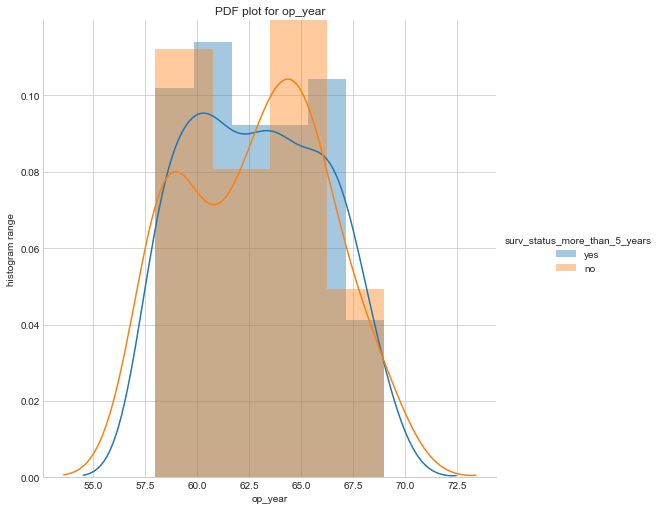

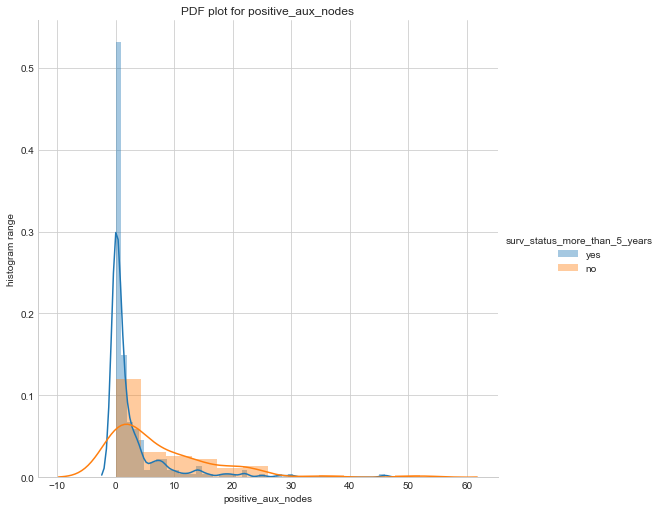

In [123]:
#   PDF:Probability desnity function 
for i,columns in enumerate(list(bcancer_df.columns)[:-1]):
    sns.set_style("whitegrid")
    a=sns.FacetGrid(bcancer_df,hue="surv_status_more_than_5_years",size=7)
    a.map(sns.distplot,columns).add_legend()
    plt.title("PDF plot for {}".format(columns))
    plt.ylabel("histogram range")
    plt.show()

[0.00986558 0.01664817 0.02836355 0.03267974 0.03391294 0.02528055
 0.02528055 0.01109878 0.00431619 0.0012332 ]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
Text(0.5,1,'CDF Age plot')


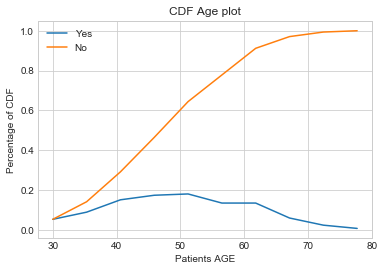

In [124]:
#CDF :Cummulative distribution function

import numpy as np

sns.set_style("whitegrid")

counts,bin_edges=np.histogram(bcancer_df["Patients-age"],bins=10,density=True)
print(counts)
print(bin_edges)

pdf = counts/(sum(counts))

cdf =np.cumsum(pdf)

plt.plot(bin_edges[:-1],pdf)

plt.plot(bin_edges[:-1],cdf)

print(plt.title("CDF Age plot"))
plt.xlabel("Patients AGE")
plt.legend(['Yes','No'])

plt.ylabel("Percentage of CDF")
plt.show()

[0.18716578 0.08318479 0.07724302 0.06833036 0.08912656 0.09209745
 0.08318479 0.08318479 0.07427213 0.07130125]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
Text(0.5,1,'CDF Operation year plot')


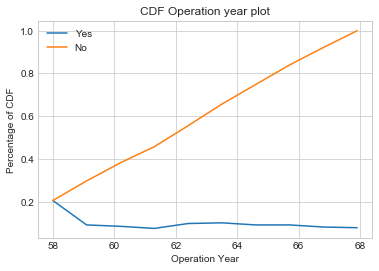

In [125]:
plt.close()
counts,bin_edges=np.histogram(bcancer_df["op_year"],bins=10,density=True)

print(counts)
print(bin_edges)

pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[:-1],pdf)
plt.plot(bin_edges[:-1],cdf)
print(plt.title("CDF Operation year plot"))
plt.legend(['Yes','No'])
plt.xlabel("Operation Year")
plt.ylabel("Percentage of CDF")



plt.show()


[0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
Text(0.5,1,'CDF positive axilliary nodes plot')


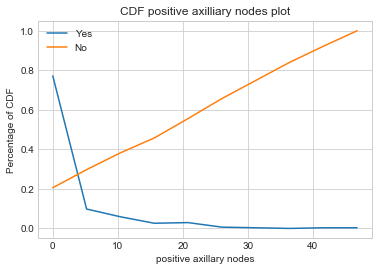

In [126]:
plt.close()

counts,bin_edges=np.histogram(bcancer_df["positive_aux_nodes"],bins=10,density=True)
print(counts)
print(bin_edges)
pdf=counts/(sum(counts))
plt.plot(bin_edges[:-1],pdf)
plt.plot(bin_edges[:-1],cdf)
print(plt.title("CDF positive axilliary nodes plot"))
plt.legend(['Yes','No'])
plt.xlabel("positive axillary nodes")
plt.ylabel("Percentage of CDF")
plt.show()



# 5.1  BOX PLOTS:
    Box plots are used to find inter quartile range IQR.
    IQR Value =Thrid quadrent -Ist quadrent
    By using IQR value we can define the maximum density lies on which range
    Whiskers =1.5*IQR
    middle line is called as median

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5,1,'fig1_boxplot (surv_status_more_than_5_years vs Patients-age)')

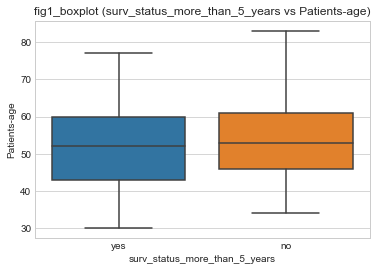

In [127]:
a=sns.boxplot(x="surv_status_more_than_5_years",y="Patients-age",data=bcancer_df)
print(a)
plt.title('fig1_boxplot (surv_status_more_than_5_years vs Patients-age)')

Text(0.5,1,'fig1.2_boxplot (surv_status_more_than_5_years , op_year)')

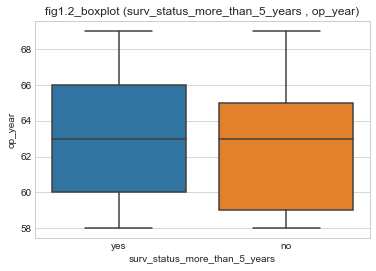

In [128]:
b=sns.boxplot(x="surv_status_more_than_5_years",y="op_year",data=bcancer_df)
plt.title('fig1.2_boxplot (surv_status_more_than_5_years , op_year)')

Text(0.5,1,'fig1.3_boxplot (surv_status_more_than_5_years , positive_aux_nodes)')

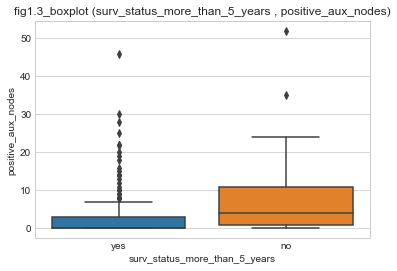

In [129]:
sns.boxplot(x="surv_status_more_than_5_years",y="positive_aux_nodes",data=bcancer_df)
plt.title('fig1.3_boxplot (surv_status_more_than_5_years , positive_aux_nodes)')

# 5.2 Violin Plots:
    Combination of density and box plot is called  violin plots

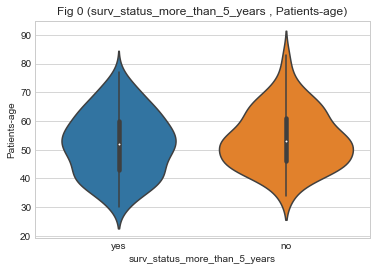

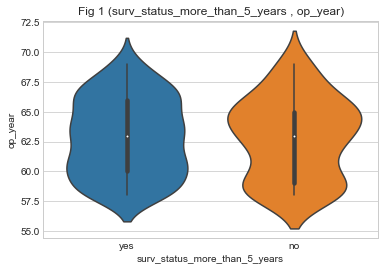

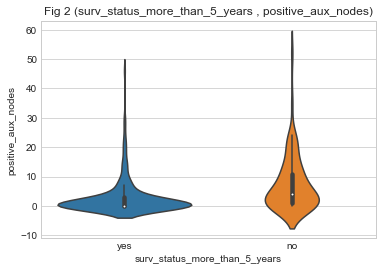

In [130]:
for i,columns in enumerate(list(bcancer_df.columns)[:-1]):

    #print(columns)
    # print(i)
    sns.violinplot(x="surv_status_more_than_5_years",y=columns,data=bcancer_df,size=10)
    plt.title("Fig {0} (surv_status_more_than_5_years , {1})".format(i,columns))
    plt.show()

# Observations:
       1) From Pdf plots is it very diffcult to observe because all plots are overlapped.
    From the above plots following observations are made:
       2) From Fig1.1_boxplot: surv_status_more_than_5_years vs age
           50% patients are age group of 45 to 60.
           The patients age group between 45-55 have higher chances of  survived 5 years or longer  
           Age above 60  have high chances the patient died within 5 year
                         
       3) From Fig 1.2_boxplot: surv_status_more_than_5_years vs op_year
            50% operations are happened in between 1960-1966.
            The greater the chance of survival if the operation occurred after 1960.
       4) From Fig 1.3_boxplot : surv_status_more_than_5_years vs positive_aux_nodes
           75 % of surv_status_more_than_5_years patients have positive axillary nodes less than 5.
           25 % of surv_status_more_than_5_years patients have no positive axillary nodes.
       
                         
                         

# 6) Bi-variate analysis

# 6.1) Scatter plot 

Scatter plot:
Scatter plot is a two dimensional data visualization,
it is used to co-relate between two variables and represented as "o" in graph.

Text(0.5,1,'Fig 6.1 (Positive axilliary nodes , opeartion year)')

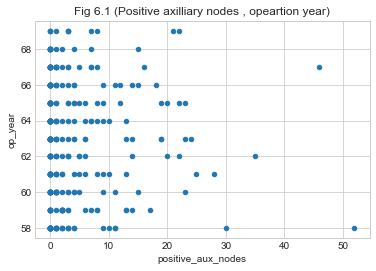

In [131]:
bcancer_df.plot(kind='scatter',x='positive_aux_nodes',y="op_year")
plt.title("Fig 6.1 (Positive axilliary nodes , opeartion year)")

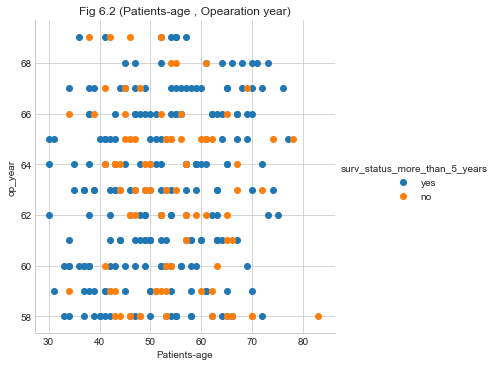

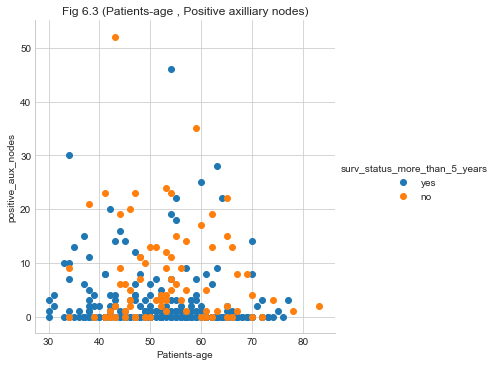

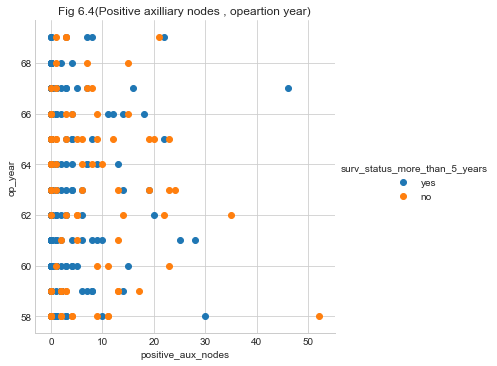

In [132]:
plt.close()
bva=sns.FacetGrid(bcancer_df,hue="surv_status_more_than_5_years",size=5)
bva.map(plt.scatter,"Patients-age","op_year")
bva.add_legend()
plt.title("Fig 6.2 (Patients-age , Opearation year)")
plt.show()

bva=sns.FacetGrid(bcancer_df,hue="surv_status_more_than_5_years",size=5)
bva.map(plt.scatter,"Patients-age","positive_aux_nodes")
bva.add_legend()
plt.title("Fig 6.3 (Patients-age , Positive axilliary nodes)" )
plt.show()

bva=sns.FacetGrid(bcancer_df,hue="surv_status_more_than_5_years",size=5)
bva.map(plt.scatter,"positive_aux_nodes","op_year")
bva.add_legend()
plt.title("Fig 6.4(Positive axilliary nodes , opeartion year)")
plt.show()



# Observations:
       1) From fig 6.1 it is diffcult to diffentiate between two variables having same colour,
                 so used seaborn to give unique colour to each variable.
       2) From fig 6.4 ,it is easy to segregate between patients survived more than 5 years -
              - and patients died before 5 years
              


# 6.2 PAIR PLOTS

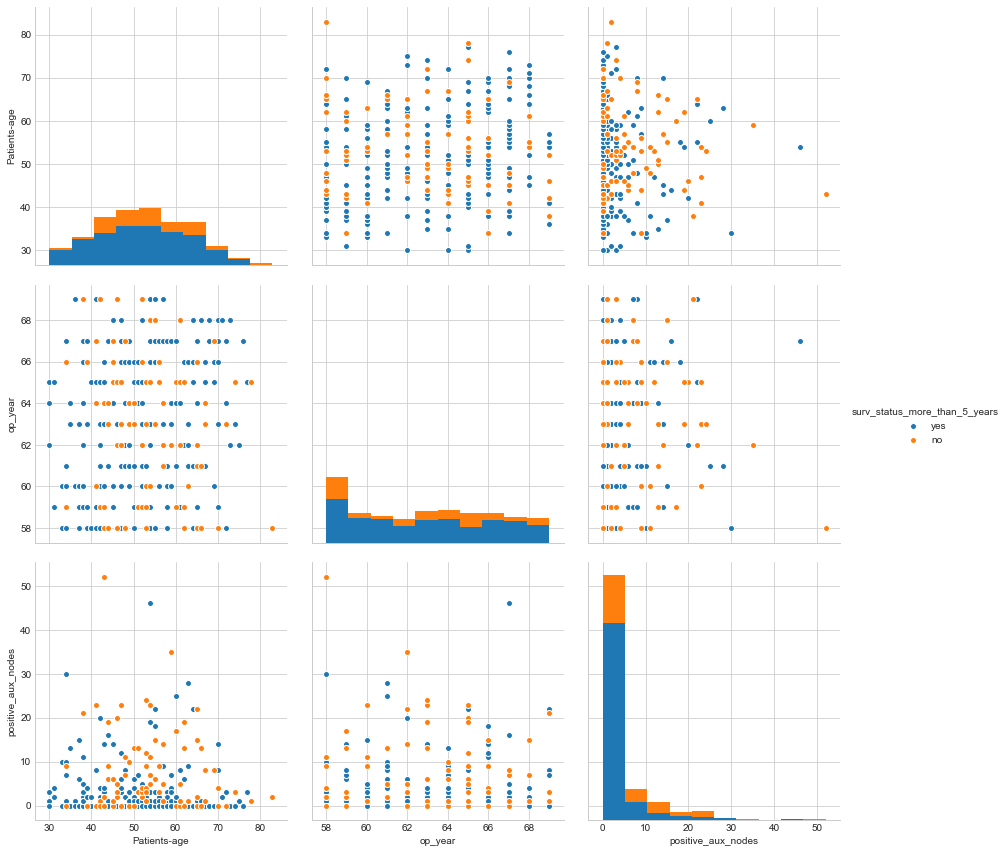

In [133]:
sns.pairplot(bcancer_df,hue="surv_status_more_than_5_years",size=4)
plt.show()


# Observations:

   1) By scattering the data points between op_year and positive_aux_nodes, -
      -we can see the better seperation between the two classes than other scatter plots.
   2) More points are overlapped in all cases.
   

# Conculsion:
   More than 73.5% of the patients are survived more than 5 years and 26.4% patients-
    -are died before 5 years,
   By making model with a operation year vs postive axillary nodes,better sepeartion is possible.
   With a Box plots easy to extract and more relevent data compared with pairplot. 